In [363]:
import pandas as pd
import numpy as np
from datetime import datetime

In [364]:
train_data = pd.read_csv("train_fwYjLYX.csv")
test_data = pd.read_csv("test_1eLl9Yf.csv")

In [365]:
print(train_data.shape)
print(test_data.shape)
train_data.head()

(80402, 6)
(180, 3)


,application_date,segment,branch_id,state,zone,case_count
0,4/1/2017,1,1.0,WEST BENGAL,EAST,40
1,4/3/2017,1,1.0,WEST BENGAL,EAST,5
2,4/4/2017,1,1.0,WEST BENGAL,EAST,4
3,4/5/2017,1,1.0,WEST BENGAL,EAST,113
4,4/7/2017,1,1.0,WEST BENGAL,EAST,76


In [366]:
test_data.head()

,id,application_date,segment
0,1,2019-07-06,1
1,2,2019-07-07,1
2,3,2019-07-08,1
3,4,2019-07-09,1
4,5,2019-07-10,1


In [367]:
def MAPE(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

## EDA

In [435]:
train_data.dtypes

application_date     object
segment               int64
branch_id           float64
state                object
zone                 object
case_count            int64
dtype: object

In [441]:
num_cols_eda = train_data.select_dtypes(exclude=['object']).columns.tolist()

In [443]:
num_cols_eda

['segment', 'branch_id', 'case_count']

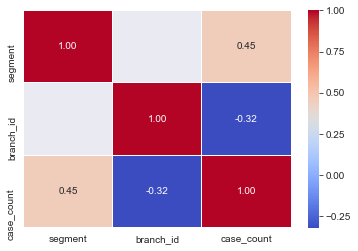

In [461]:
corelation_mat = train_data[num_cols_eda].corr()
sns.heatmap(corelation_mat,annot=True, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)

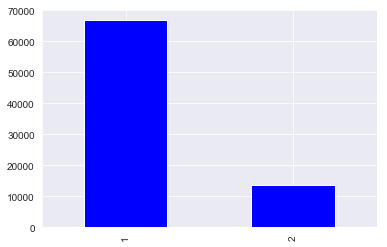

In [462]:
train_data['segment'].value_counts().plot(kind = "bar",color="blue")

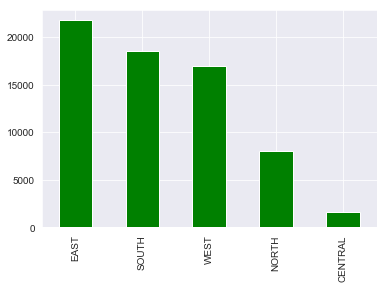

In [453]:
train_data['zone'].value_counts().plot('bar',color='green')

In [491]:
for i in ["segment","branch_id","state","zone"]:
    print(f"{i}: {train_data[i].nunique()}")
    # print(f"{i} has {train_data[i].nunique()} unique records")

segment: 2
branch_id: 83
state: 20
zone: 5


In [492]:
for col in ["segment","state","zone"]:
    #print("Value count for %s is :: " %(col))
    print(f"Value count for {col} is ")
    print(100*train_data[col].value_counts(normalize=True))

Value count for segment is 
1    83.204398
2    16.795602
Name: segment, dtype: float64
Value count for state is 
MAHARASHTRA       14.081739
WEST BENGAL        9.069426
GUJARAT            9.069426
TAMIL NADU         8.066964
UTTAR PRADESH      8.066964
PUNJAB             6.062038
ANDHRA PRADESH     6.014776
HARYANA            5.059576
ASSAM              5.059576
ORISSA             4.057113
KARNATAKA          4.057113
BIHAR              4.057113
TRIPURA            3.054650
JHARKHAND          3.054650
KERALA             2.052188
MADHYA PRADESH     2.052188
CHHATTISGARH       2.052188
UTTARAKHAND        2.004925
TELANGANA          2.004925
DELHI              1.002463
Name: state, dtype: float64
Value count for zone is 
EAST       32.530120
SOUTH      27.710843
WEST       25.301205
NORTH      12.048193
CENTRAL     2.409639
Name: zone, dtype: float64


In [495]:
for col in ["segment","state","zone"]:
    print(train_data.groupby(col)['case_count'].mean().reset_index().sort_values('case_count', ascending=False))
    print('\n')

   segment  case_count
1        2  942.318646
0        1   32.707106


             state  case_count
14      TAMIL NADU  634.457601
8        KARNATAKA  519.345494
9           KERALA  496.008485
2            BIHAR  419.025445
12          ORISSA  408.938688
10  MADHYA PRADESH  348.672121
19     WEST BENGAL  212.441306
1            ASSAM  187.618240
3     CHHATTISGARH  181.298788
4            DELHI  168.486352
5          GUJARAT   84.943774
16         TRIPURA   82.313111
7        JHARKHAND   69.036645
11     MAHARASHTRA   66.730701
15       TELANGANA   56.153226
17   UTTAR PRADESH   43.638760
18     UTTARAKHAND   24.782258
13          PUNJAB   14.948502
0   ANDHRA PRADESH    3.517370
6          HARYANA    2.961652


      zone  case_count
4     WEST   46.985053
1     EAST   29.170802
2    NORTH   27.383002
3    SOUTH   26.973784
0  CENTRAL   23.082506




In [368]:
train_data['application_date'] = data['application_date'].apply(lambda x: datetime.strptime(x, "%m/%d/%Y").strftime('%Y-%m-%d'))

In [430]:
train_data.head()

,application_date,segment,branch_id,state,zone,case_count
0,2017-04-01,1,1.0,WEST BENGAL,EAST,40
1,2017-04-03,1,1.0,WEST BENGAL,EAST,5
2,2017-04-04,1,1.0,WEST BENGAL,EAST,4
3,2017-04-05,1,1.0,WEST BENGAL,EAST,113
4,2017-04-07,1,1.0,WEST BENGAL,EAST,76


In [370]:
train_seg1=train_data[train_data['segment']==1].groupby(['application_date']).sum().reset_index()[['application_date','case_count']].sort_values('application_date')

In [371]:
train_seg2=train_data[train_data['segment']==2].groupby(['application_date']).sum().reset_index()[['application_date','case_count']].sort_values('application_date')

In [372]:
print(train_seg1.shape)
print(train_seg2.shape)

(806, 2)
(844, 2)


In [373]:
train_seg1.head()

,application_date,case_count
0,2017-04-01,299
1,2017-04-03,42
2,2017-04-04,23
3,2017-04-05,1530
4,2017-04-07,1341


In [374]:
train_seg2.head()

,application_date,case_count
0,2017-04-01,897
1,2017-04-02,605
2,2017-04-03,2016
3,2017-04-04,2245
4,2017-04-05,2415


In [375]:
test_seg1 = test_data[test_data['segment']==1][['application_date']].sort_values('application_date')
test_seg2 = test_data[test_data['segment']==2][['application_date']].sort_values('application_date')

In [376]:
test_seg1.shape

(87, 1)

In [377]:
test_seg2.shape

(93, 1)

In [378]:
import holidays
ind_holidays = holidays.IND(years=[2017,2018,2019])

In [379]:
type(ind_holidays)

holidays.countries.india.IND

In [380]:
from datetime import date
for date, name in sorted(ind_holidays.items()):
    print(str(date),name)
    hol.append(str(date))

2017-01-14 Makar Sankranti / Pongal
2017-01-26 Republic Day
2017-05-01 Labour Day
2017-08-15 Independence Day
2017-10-02 Gandhi Jayanti
2017-12-25 Christmas
2018-01-14 Makar Sankranti / Pongal
2018-01-26 Republic Day
2018-05-01 Labour Day
2018-08-15 Independence Day
2018-10-02 Gandhi Jayanti
2018-12-25 Christmas
2019-01-14 Makar Sankranti / Pongal
2019-01-26 Republic Day
2019-05-01 Labour Day
2019-08-15 Independence Day
2019-10-02 Gandhi Jayanti
2019-12-25 Christmas


In [381]:
len(hol)

75

In [382]:
hol[1:5]

['2017-03-13', '2017-03-28', '2017-04-05', '2017-04-09']

In [383]:
train_seg1['hol']=train_seg1.application_date.isin(hol)
test_seg1['hol']=test_seg1.application_date.isin(hol)

In [384]:
train_seg1.head()

,application_date,case_count,hol
0,2017-04-01,299,False
1,2017-04-03,42,False
2,2017-04-04,23,False
3,2017-04-05,1530,True
4,2017-04-07,1341,False


In [385]:
train_seg1.case_count.describe()

count      806.000000
mean      2714.689826
std       2042.418090
min          1.000000
25%       1633.250000
50%       2602.000000
75%       3333.000000
max      21885.000000
Name: case_count, dtype: float64

In [386]:
len(train_seg1)

806

In [387]:
def create_features(df, label=None,seg=None):
    """
    Creates time series features from datetime index.
    """
    df = df.copy()

    df['date'] = df.application_date
    df['date'] = pd.to_datetime(df['date'])    
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['week'] = df['date'].dt.week
    df['is_month_start']=df['date'].dt.is_month_start
    df['is_month_end']=df['date'].dt.is_month_end
    df['is_quarter_start']=df['date'].dt.is_quarter_start
    df['is_quarter_end']=df['date'].dt.is_quarter_end
    df['is_year_start']=df['date'].dt.is_year_start
    df['is_year_end']=df['date'].dt.is_year_end
    df['Semester'] = np.where(df['quarter'].isin([1,2]),1,2)
    
    X = df.drop(['date','application_date'],axis=1)
    if label:
        y = df[label]
        return X
    return X

In [388]:
Xtrain_s1 = create_features(train_seg1, label='case_count',seg='1')

In [389]:
Xtest_s1= create_features(test_seg1)

In [390]:
Xtrain_s1.head()

,case_count,hol,dayofweek,quarter,month,year,dayofyear,dayofmonth,week,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,Semester
0,299,False,5,2,4,2017,91,1,13,True,False,True,False,False,False,1
1,42,False,0,2,4,2017,93,3,14,False,False,False,False,False,False,1
2,23,False,1,2,4,2017,94,4,14,False,False,False,False,False,False,1
3,1530,True,2,2,4,2017,95,5,14,False,False,False,False,False,False,1
4,1341,False,4,2,4,2017,97,7,14,False,False,False,False,False,False,1


In [391]:
Xtest_s1.head()

,hol,dayofweek,quarter,month,year,dayofyear,dayofmonth,week,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,Semester
0,False,5,3,7,2019,187,6,27,False,False,False,False,False,False,2
1,False,6,3,7,2019,188,7,27,False,False,False,False,False,False,2
2,False,0,3,7,2019,189,8,28,False,False,False,False,False,False,2
3,False,1,3,7,2019,190,9,28,False,False,False,False,False,False,2
4,False,2,3,7,2019,191,10,28,False,False,False,False,False,False,2


In [392]:
Xtrain_s1['Semester'].value_counts()

1    442
2    364
Name: Semester, dtype: int64

In [393]:
Xtrain_s1.shape

(806, 16)

In [394]:
Xtrain_s1 = Xtrain_s1[Xtrain_s1['case_count']>15]
Xtrain_s1 = Xtrain_s1[Xtrain_s1['case_count']<=8000]
Xtrain_s1=Xtrain_s1.reset_index().drop('index',axis=1)

In [395]:
Xtrain_s1.shape

(780, 16)

In [396]:
Xtrain_s2 = create_features(train_seg2, label='case_count',seg='2')
Xtest_s2= create_features(test_seg2,seg='2')

In [397]:
len(Xtrain_s2)

844

In [398]:
Xtrain_s2[Xtrain_s2['case_count']>40000]

,case_count,dayofweek,quarter,month,year,dayofyear,dayofmonth,week,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,Semester
474,43340,3,3,7,2018,200,19,29,False,False,False,False,False,False,2


In [399]:
Xtrain_s2 = Xtrain_s2[Xtrain_s2['case_count']<40000]
Xtrain_s2 = Xtrain_s2.reset_index().drop('index',axis=1)

In [400]:
len(Xtrain_s2)

843

In [401]:
Xtrain_s2.head()

,case_count,dayofweek,quarter,month,year,dayofyear,dayofmonth,week,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,Semester
0,897,5,2,4,2017,91,1,13,True,False,True,False,False,False,1
1,605,6,2,4,2017,92,2,13,False,False,False,False,False,False,1
2,2016,0,2,4,2017,93,3,14,False,False,False,False,False,False,1
3,2245,1,2,4,2017,94,4,14,False,False,False,False,False,False,1
4,2415,2,2,4,2017,95,5,14,False,False,False,False,False,False,1


In [402]:
#from catboost import CatBoostClassifier,Pool, cv,CatBoostRegressor
#from lightgbm import LGBMClassifier,LGBMRegressor
from sklearn.model_selection import StratifiedKFold,train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score

In [403]:
col_to_drop=['case_count']
X,y=Xtrain_s1.drop(col_to_drop,axis=1),Xtrain_s1['case_count']
Xtest=Xtest_s1

In [404]:
print(X.shape,Xtest.shape)
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.3,random_state = 1994)

(780, 15) (87, 15)


In [426]:
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
rf=DecisionTreeRegressor(random_state=1995,max_leaf_nodes=110,max_depth=10)
rf.fit(X_train,y_train)

p=rf.predict(X_val)

print('MAPE :: ',MAPE(y_val,p))

MAPE ::  15.495480436208883


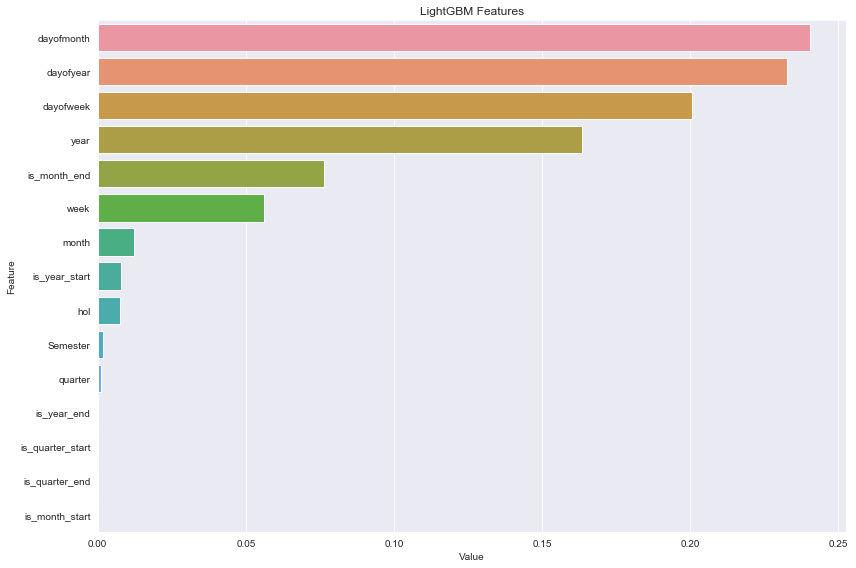

In [406]:
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
sns.set_style('darkgrid')
warnings.filterwarnings('ignore')

%matplotlib inline
feature_imp = pd.DataFrame(sorted(zip(rf.feature_importances_, X.columns), reverse=True)[:300], 
                           columns=['Value','Feature'])

plt.figure(figsize=(12,8))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features')
plt.tight_layout()
plt.show()

In [407]:
grp=Xtrain_s1['dayofmonth'].values

In [408]:
len(grp)

780

In [427]:
y_pred_tot_s1=[]
err=[]
from sklearn.model_selection import KFold,StratifiedKFold,TimeSeriesSplit,GroupKFold,GroupShuffleSplit
fold=GroupKFold(n_splits=20)

i=1
for train_index, test_index in fold.split(X,y,grp):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    m=DecisionTreeRegressor(random_state=1994,max_leaf_nodes=100,max_features=10)
    m.fit(X_train,y_train)
    preds=m.predict(X_test)
    print("err: ",MAPE(y_test,preds))
    err.append(MAPE(y_test,preds))
    p = m.predict(Xtest)
    i=i+1
    y_pred_tot_s1.append(p)

err:  28.945200529380045
err:  22.523956551747055
err:  35.35607691811325
err:  37.480304016963025
err:  61.27978420189357
err:  30.64813027271406
err:  32.6962265238327
err:  33.08518971256327
err:  36.27682325724144
err:  18.816041910426982
err:  23.01913682874626
err:  16.002233346017604
err:  17.287220682102927
err:  17.00865407752687
err:  19.413071832169706
err:  24.468887670182312
err:  23.011705517986876
err:  30.327537041069764
err:  28.641308118489434
err:  24.44806880003827


In [410]:
np.mean(err)

74.67054733244018

In [411]:
len(y_pred_tot_s1)

20

In [412]:
len(y_pred_tot_s1[1])

87

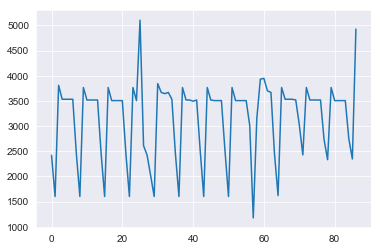

In [413]:
plt.plot(np.mean(y_pred_tot_s1,0))

In [414]:
col_to_drop=['case_count']
X,y=Xtrain_s2.drop(col_to_drop,axis=1),Xtrain_s2['case_count']
Xtest=Xtest_s2

print(X.shape,Xtest.shape)
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.3,random_state = 1994)

(843, 14) (93, 14)


In [415]:
from sklearn.ensemble import RandomForestRegressor
rf=DecisionTreeRegressor(random_state=1994,max_depth=10,max_features=11)
rf.fit(X_train,y_train)

p=rf.predict(X_val)

print('MAPE',mean_absolute_percentage_error(y_val,p))

MAPE 24.00650286255746


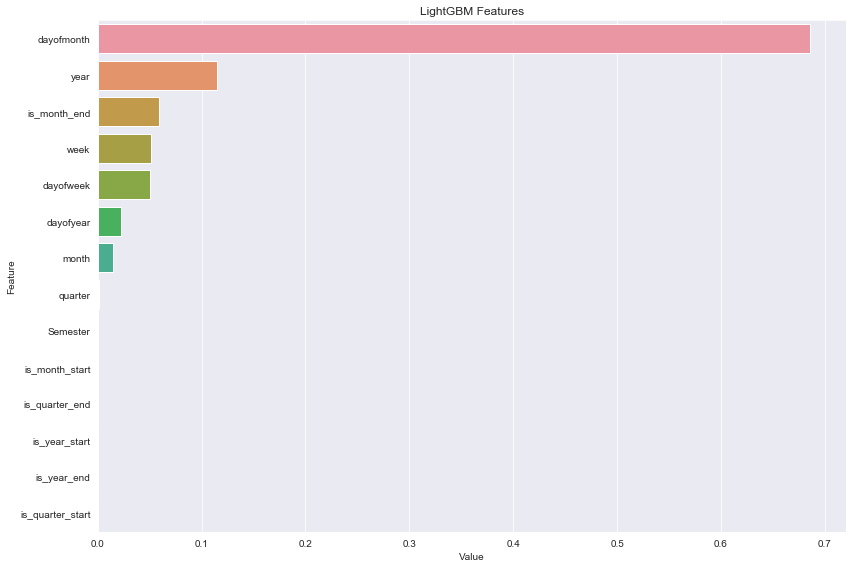

In [416]:
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
sns.set_style('darkgrid')
warnings.filterwarnings('ignore')

%matplotlib inline
feature_imp = pd.DataFrame(sorted(zip(rf.feature_importances_, X.columns), reverse=True)[:300], 
                           columns=['Value','Feature'])
plt.figure(figsize=(12,8))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features')
plt.tight_layout()
plt.show()

In [417]:
grp=Xtrain_s2['dayofyear'].values

In [428]:
y_pred_tot_s2=[]
err=[]
from sklearn.model_selection import KFold,StratifiedKFold,TimeSeriesSplit
fold=GroupKFold(n_splits=10)
i=1
for train_index, test_index in fold.split(X,y,grp):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    m=DecisionTreeRegressor(random_state=1994,max_features=12)
    m.fit(X_train,y_train)
    preds=m.predict(X_test)
    print("err: ",MAPE(y_test,preds))
    err.append(MAPE(y_test,preds))
    p = m.predict(Xtest)
    i=i+1
    y_pred_tot_s2.append(p)

err:  19.413530329050158
err:  21.02840180570278
err:  26.142880367255145
err:  21.270734788666427
err:  33.960312180231575
err:  28.21523341457745
err:  23.48079545345218
err:  23.205613232127682
err:  31.026905776096402
err:  22.603793795752352


In [419]:
np.mean(err)

25.034820114291215

In [420]:
len(y_pred_tot_s2[1])

93

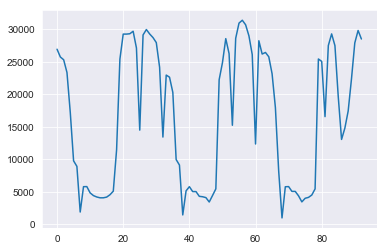

In [421]:
plt.plot(np.mean(y_pred_tot_s2,0))

In [422]:
test_data.loc[test_data.segment==1, 'case_count']=np.mean(y_pred_tot_s1,0)
test_data.loc[test_data.segment==2, 'case_count']=np.mean(y_pred_tot_s2,0)

In [423]:
test_data

,id,application_date,segment,case_count
0,1,2019-07-06,1,2419.335275
1,2,2019-07-07,1,1601.375786
2,3,2019-07-08,1,3810.980022
3,4,2019-07-09,1,3533.774295
4,5,2019-07-10,1,3533.774295
5,6,2019-07-11,1,3533.774295
6,7,2019-07-12,1,3533.774295
7,8,2019-07-13,1,2463.146200
8,9,2019-07-14,1,1601.375786
9,10,2019-07-15,1,3767.021787
